In [39]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score, train_test_split, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [2]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()

In [3]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
# Add target and class to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

In [6]:
# Show 10 random samples
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


In [3]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [28]:
# same process as always, identify your X's and your y's
X = df_iris.iloc[:,:4]
y = df_iris.iloc[:,4]


In [29]:
#train-test-split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
# Scale the X's
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
# apply the lda transformation
lda =  LinearDiscriminantAnalysis(n_components=2).fit(x_train, y_train)
predictions = lda.predict(x_test)
print(predictions.shape)
score = lda.score(x_train,y_train)
print(score)
cv = cross_validate(lda, x_train, y_train, cv=5)
# YOUR CODE HERE

def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    #print out the mean of the cross validation
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

(30,)
0.975
Crossvalidation fold: 0  Accruacy: 0.9583333333333334
Crossvalidation fold: 1  Accruacy: 0.9583333333333334
Crossvalidation fold: 2  Accruacy: 1.0
Crossvalidation fold: 3  Accruacy: 1.0
Crossvalidation fold: 4  Accruacy: 0.9583333333333334
Mean train cross validation score 0.975


In [52]:
# select 2 principal components
lda.explained_variance_ratio_

array([0.9911804, 0.0088196])

ValueError: not enough values to unpack (expected 2, got 1)

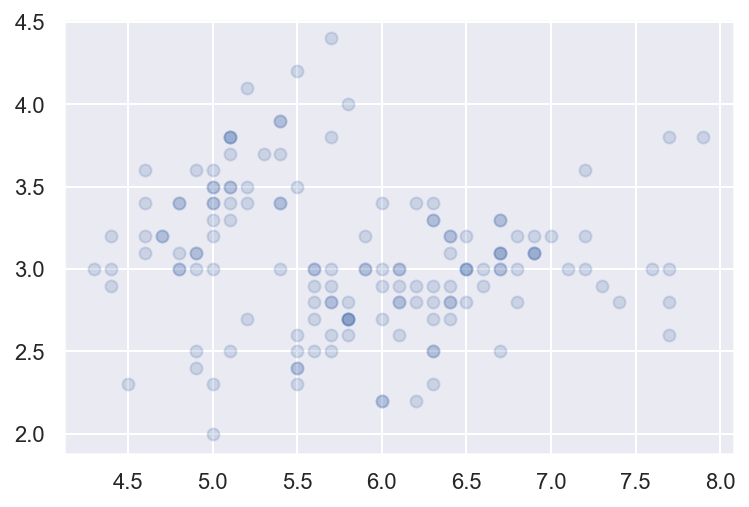

In [48]:
# take a look at the new axes for the data and plot them
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df_iris.iloc[:,0],df_iris.iloc[:,1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, lda.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
# what about the variability?

In [40]:
# Run a Random Forest Classifier with the transformed data
clf = RandomForestClassifier(random_state=0).fit(x_train,y_train)

In [2]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?